#  histogrammes et densités 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## Graphiques en batons


bonjour toto \index{toto}

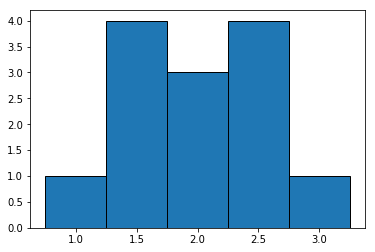

In [2]:
x= [1,1.5,2,2.5,3]
y= [1,4,3,4,1]

""" Par défaut  width=0.8, ce qui ne ferait pas joli ici"""
plt.bar(x,y,edgecolor="k",width=0.5); # "k" c'est black


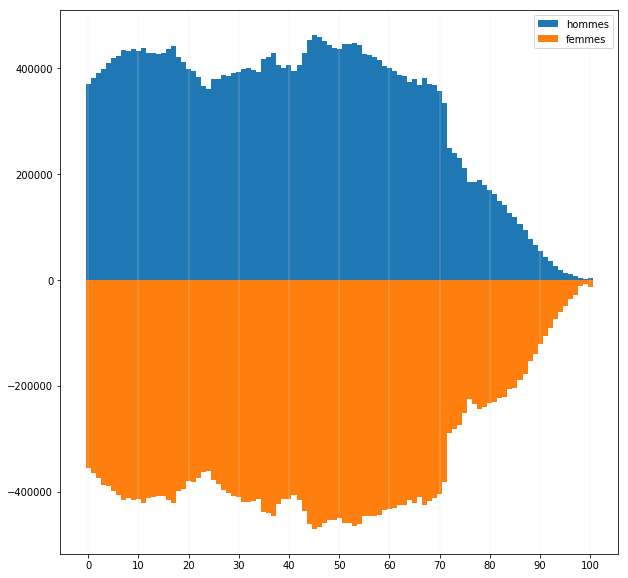

In [3]:
""" Population totale par sexe et âge au 1er janvier 2018, France. source:
https://www.insee.fr/fr/statistiques/fichier/1892086/pop-totale-france.xls """
nb_hommes=[370264,380786,390091,398757,409096,419458,422341,433633,433293,435936,432382,439050,429300,427923,426042,428943,436599,442760,420335,411745,397771,394287,384071,365958,361467,378875,380348,386998,386152,391032,392666,397890,400708,396839,392953,417916,422120,429147,406565,399665,406674,394569,405691,428904,452528,462957,459928,451838,443890,438042,436591,445267,446241,448156,443106,425952,424946,421198,414831,404537,400466,395119,387700,385660,374649,378923,368702,381299,370877,367734,357172,334517,249885,240416,230819,211303,184231,186016,189134,179799,169183,162468,149256,142187,126683,119777,106150,94411,76897,65760,54174,43318,35138,26429,19424,14138,10396,7400,2994,1612,2929,]
nb_femmes=[354226,363749,373574,386477,389867,398597,405611,415679,412153,415631,413237,420649,411513,409866,407270,408649,416111,421402,398604,394150,380429,381718,374299,363324,360271,378034,385787,396563,401533,408101,410675,420196,419362,418329,413567,437539,440858,446720,423369,413791,414315,405569,414926,435625,461600,470512,467329,459041,453968,453315,449798,459334,459223,465447,461150,445813,446626,446154,444025,434265,433063,429825,425865,424456,416053,420938,410389,425522,417056,411404,404106,382498,289497,281703,273366,251816,224905,234778,243629,239419,233198,231156,222866,220997,205946,204422,188772,178310,153484,139112,120327,105685,90293,73890,60007,48181,36624,27518,11907,7042,13945,]
nb_femmes=-np.array(nb_femmes)

ages=range(0,len(nb_hommes))

plt.figure(figsize=(10,10))

plt.bar(ages,nb_hommes,width=1,label="hommes")
plt.bar(ages,nb_femmes,width=1,label="femmes")
xticks=np.arange(0,101,10)
plt.xticks(xticks)
for x in xticks: plt.axvline(x,color="0.9",linewidth=0.3)
plt.legend();




Exo: changez les abscisses pour faire apparaitre les années de naissances. Essayez de justifier les trous et les bonnes dans la pyramide d'âge. 

Exo: Comment expliquez-vous le grand nombre de centenaire comparez aux personnes de 98 ou 99 ans ?

## Histogrammes

Considérons maintenant un échantillon c.à.d un ensemble de nombre réels. Dans la plupart des cas les échantillons sont construit:
* soit à partir de simulation successive de v.a (ex: v.a gaussienne)
* soit à partir d'observations (ex: tailles des gens dans la rue)

Dresser l'histogramme d'un échantillon consiste à découper les réel en sous-interavalles, puis d'afficher des batons qui ont pour base ces sous-intervallse, et comme hauteur le nombre d'élément de l'échantillon contenu dans chaque sous-intervalles. 


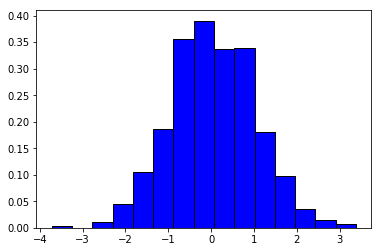

In [4]:
"""l'échantillon à observer"""
X=np.random.normal(0,1,size=1000)
plt.hist(X,bins=15,color='blue',density=True,edgecolor="k");

Explication des options de plt.hist :

* bins=10 : on découpe l'intervalle [min(X),max(X)] en dix sous-intervalles.
* normed=True: la hauteur des batons est normalisée pour que cela ressemble à une densité
* rwidth=0.9: la largeur de chaque baton occupe 90% de chaque sous-intervalle.


Mais parfois il est préférable de préciser nous même les sous-intervalles (=la base des batons)

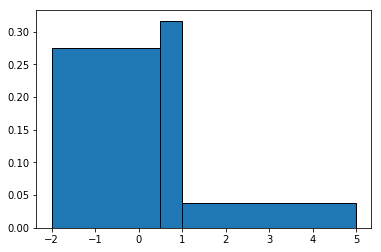

In [5]:
X=np.random.normal(0,1,size=1000)
plt.hist(X, bins=[-2,0.5,1,5],  density=True,edgecolor="k"); #un choix particulièrement idiot de bins

## Histogramme de loi discrète

Attention, pour les lois discrètes il faut obligatoirement préciser le découpage.
Pour voir une catastrophe, remplacez  bins par 11 dans plt.hist(). Expliquez le phénomène.

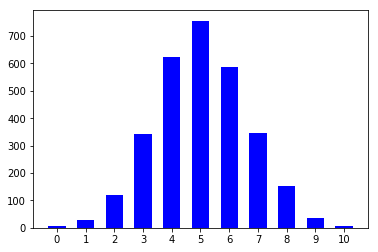

In [6]:
n=10
X=np.random.binomial(n,0.5,size=3000)

"""attention np.arange(0,n+2,1) donne l'intervalle discret [0,n+2[= [0,n+1].
 on lui soustrait ensuite 0.5 pour avoir chaque entier de [0,n] dans un sous-intervalle"""
bins=np.arange(0,n+2,1)-0.5

""" rwidth=0.6 (=ratio_width) signifie que la base des batons occupe 60% des sous-intervalles.  """
plt.hist(X,bins=bins, histtype='bar', color='blue', rwidth=0.6) 
"""on précise les graduations en x"""
plt.xticks(np.arange(0,n+1,1));

### Plusieurs histogrammes
comparons des lois béta

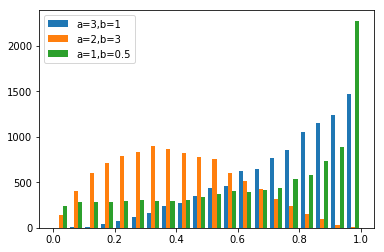

In [7]:
nbData=10000
X1=np.random.beta(3,1,size=nbData)
X2=np.random.beta(2,3,size=nbData)
X3=np.random.beta(1,0.5,size=nbData)

plt.hist([X1,X2,X3],bins=20,label=["a=3,b=1","a=2,b=3","a=1,b=0.5"]);
plt.legend();

La variété des formes possible d'une loi la rend très pratique en modélisation. 

Choisissez des lois bêta bien choisies (dilatée par une constante), pour modéliser les variables X suivantes:
 * X : quantité chocolat consommée par les français  (sachant que plus on en mange, et plus on a envie d'en manger)
 * X : durée de vie des français 
 * X : durée de vie des grenouilles (forte mortalité infantile)
 
Dressez les histogrammes


Connaissez-vous d'autre loi pour des durées de vie ?

## Superposons histogramme et densité 

### une loi normale

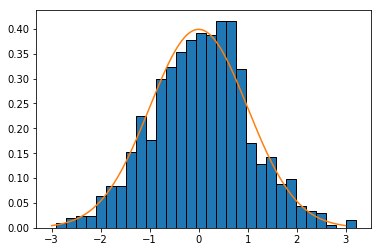

In [8]:
nbSimu=1000
Simu=np.random.normal(size=nbSimu)

"""formule à emmener partout avec soi"""
def gaussian_density(x):
    return 1/(np.sqrt(2*np.pi))*np.exp(-0.5*x**2)

plt.hist(Simu,bins=30,density=True,edgecolor="k");

x=np.linspace(-3,3,200)
plt.plot(x, gaussian_density(x));

### Tronquer un histogramme

Parfois on a envit de ne montrer qu'une partie de l'histogramme. plt.hist dispose d'une option range qui ignore les valeurs de l'échantillon en dehors du range. Mais malheureusement, plt.hist utlise la normalisation 'naturelle' qui n'est pas compatible avec la superposition avec la densité théorique.  

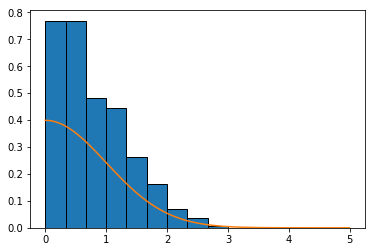

In [9]:
X=np.random.normal(0,1,size=1000)
plt.hist(X,bins=15,range=[0,5],density=True,edgecolor="k");
x=np.linspace(0,5,200)
plt.plot(x, gaussian_density(x));


Il faut donc faire la normalisation à la main, en précisant le poids de chaque observation.

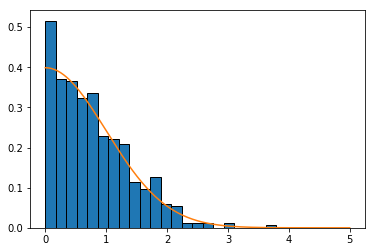

In [10]:
X=np.random.normal(0,1,size=1000)

nb_batons=30
gauche=0
droite=5
bins=np.linspace(gauche,droite,nb_batons)
step=(droite-gauche)/nb_batons
weights=np.ones_like(X)/step/len(X)

plt.hist(X,bins=bins,weights=weights,range=[gauche,droite],edgecolor="k")
x=np.linspace(gauche,droite,200)
plt.plot(x, gaussian_density(x));

***Exo:*** améliorer l'histogramme ci-dessous en tronquant les grandes valeurs de l'échantillon de lois de Cauchy. 

Plutôt que de recopier le code précédent, créez une petite fonction qui trace un histogramme tronqué. Elle pourrait par exemple avoir comme signature : `hist_tronc( ech,gauche,droite,nb_batons )`

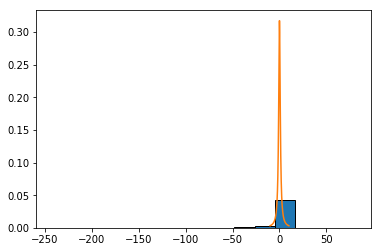

In [11]:

def cauchy_density(x):
    return 1/np.pi/(1+x**2)


X=np.random.standard_cauchy(size=200)
plt.hist(X,bins=15,density=True,edgecolor="k");
x=np.linspace(-10,10,200)
plt.plot(x, cauchy_density(x));

###  Une loi log-normale
 
***Exo:*** Que représente une distribution log-normale ?

Réponse : c'est la distribution de $f(X)$ avec $f$ ... et $X$ ...

Vérifiez votre réponse en superposant histogramme de $f(X)$  à l'histogramme proposé ci-dessous. 

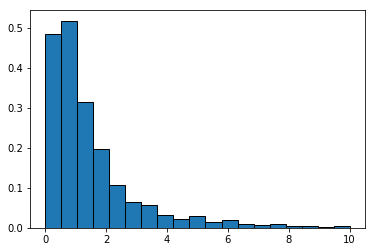

In [12]:
size=1000
X=np.random.lognormal(size=size)
bins=np.linspace(0,10,20)
plt.hist(X, bins=bins, density=True,edgecolor="k");

*** Exo suite:*** 
Réponse de la première partie : la loi log-normale c'est la loi de $exp(X)$ avec $X \sim Normale(0,1)$. 

A partir de cette description, vous devez pouvoir intuitivement comprendre que la densité de la log-normale en 0 vaut ... 
Ce fait est très mal illustrer par l'histrogramme ci-dessus. Modifiez-le ! 


#### Complétez le calcul de la densité de la log-normale :

Considérons $\phi$ une fonction teste et $X$ une v.a de loi normale.
$$
     \mathbf   E [\phi( \exp(X) )] =  cst  \int \ \phi( e^x ) \  e^{- \frac 1 2 x^2 }\ dx 
$$
on fait le changement de variable $e^x \to  y$ on trouve ...
   
donc la densité de $\exp(X)$ est ...

Superposez cette densité avec l'histogramme précédent pour valider votre calcul.




### Une loi binomiale

Quelle est le lien entre loi binomiale et loi de bernouilli ?

In [13]:
""" échantillon d'une binomiale """
X=np.random.binomial(n=10,p=0.5,size=100)
np.set_printoptions(linewidth=2000)
print("X:",X)

X: [5 4 4 7 5 2 6 7 6 4 5 5 2 7 5 5 4 6 5 6 7 5 6 3 5 4 3 8 7 5 5 7 6 6 6 2 8 5 4 3 3 2 5 6 6 4 5 6 6 8 7 7 7 4 5 6 4 6 6 4 4 6 6 3 3 1 5 7 5 5 5 4 3 5 3 2 5 4 3 9 5 5 6 5 5 5 5 5 6 3 5 7 6 6 3 6 6 3 7 5]


Dressez l'histogramme de ces simulations. Superposez cet histogramme avec la densité discrète de la loi binomiale. 

On calculera cette densité point par point (sans chercher de package particulier). Vous aurez seulement besoin de la fonction factorielle.

Remarque : Il est plus élégant de ne pas relier les points d'une densité discrète. 


In [14]:
import math
print("10!:",math.factorial(10))

10!: 3628800
